In [1]:
# copy the file from another location to current location
import os
import shutil

baseFolderPath="E:/kaggle/datasets/twitter_sentiment_analysis"
fileNames=["twitter_training.csv","twitter_validation.csv"]

# check if folder is already exist
if not os.path.exists(os.path.join(os.getcwd(),'kaggle','input')):
    os.makedirs(os.path.join(os.getcwd(),'kaggle','input'))
    print("directory created")
else:
    print("already exist")
    #remove the directory
    shutil.rmtree(os.path.join(os.getcwd(),'kaggle','input'))
    print("directory removed")
    os.makedirs(os.path.join(os.getcwd(),'kaggle','input'))
    print("directory created")

for f in fileNames:
    shutil.copy2(os.path.join(baseFolderPath,f), os.path.join(os.getcwd(),'kaggle','input',f))

already exist
directory removed
directory created


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
pd.options.mode.chained_assignment = None
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from wordcloud import WordCloud #Word visualization
import matplotlib.pyplot as plt #Plotting properties
import seaborn as sns #Plotting properties
from sklearn.feature_extraction.text import CountVectorizer #Data transformation
from sklearn.model_selection import train_test_split #Data testing
from sklearn.linear_model import LogisticRegression #Prediction Model
from sklearn.metrics import accuracy_score #Comparison between real and predicted
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder #Variable encoding and decoding for XGBoost
import re #Regular expressions
import nltk
from nltk import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Biswajit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
val=pd.read_csv(f"{os.path.join(os.getcwd(),'kaggle','input')}/twitter_validation.csv", header=None)
#Full dataset for Train-Test
train=pd.read_csv(f"{os.path.join(os.getcwd(),'kaggle','input')}/twitter_training.csv", header=None)

In [4]:
val.head(3)

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...


In [5]:
train.columns=['id','information','type','text']
train.head()

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
val.columns=['id','information','type','text']
val.head()

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [7]:
train_data=train
train_data

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [8]:
val_data=val
val_data

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [9]:
'''
To prepare the data for the text analysis an additional row was created using the method of str.lower. However, as there were some texts with only numerical values (such as one that only had a 2 as the tweet) an additional function was used for transforming all the data to string.

Then, a regex expression erased the special characters as it is common to have digitation problems on Twitter.
'''

'\nTo prepare the data for the text analysis an additional row was created using the method of str.lower. However, as there were some texts with only numerical values (such as one that only had a 2 as the tweet) an additional function was used for transforming all the data to string.\n\nThen, a regex expression erased the special characters as it is common to have digitation problems on Twitter.\n'

In [10]:
#Text transformation
train_data["lower"]=train_data.text.str.lower() #lowercase
train_data["lower"]=[str(data) for data in train_data.lower] #converting all to string
train_data["lower"]=train_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex
val_data["lower"]=val_data.text.str.lower() #lowercase
val_data["lower"]=[str(data) for data in val_data.lower] #converting all to string
val_data["lower"]=val_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex

In [11]:
train_data.head()

,id,information,type,text,lower
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


In [12]:
'''
As to identify the main words that were used per label, a word_cloud was used to see which are the most important words on the train data. For example, on the positive label words such as love and game were mostly used alongside a wide variety of words classified as "good sentiments".
'''

'\nAs to identify the main words that were used per label, a word_cloud was used to see which are the most important words on the train data. For example, on the positive label words such as love and game were mostly used alongside a wide variety of words classified as "good sentiments".\n'

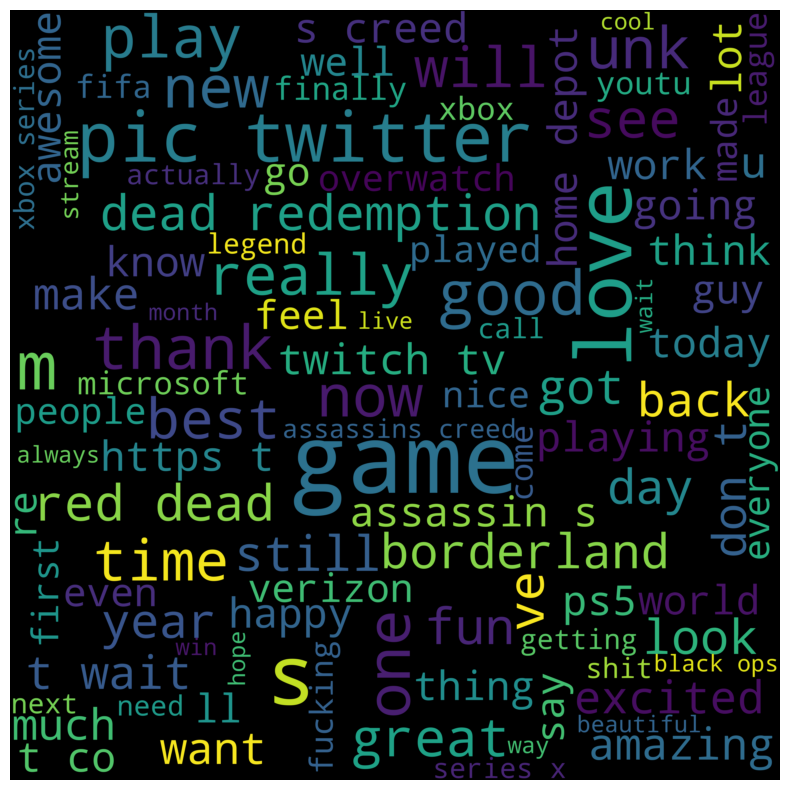

In [13]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Positive"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

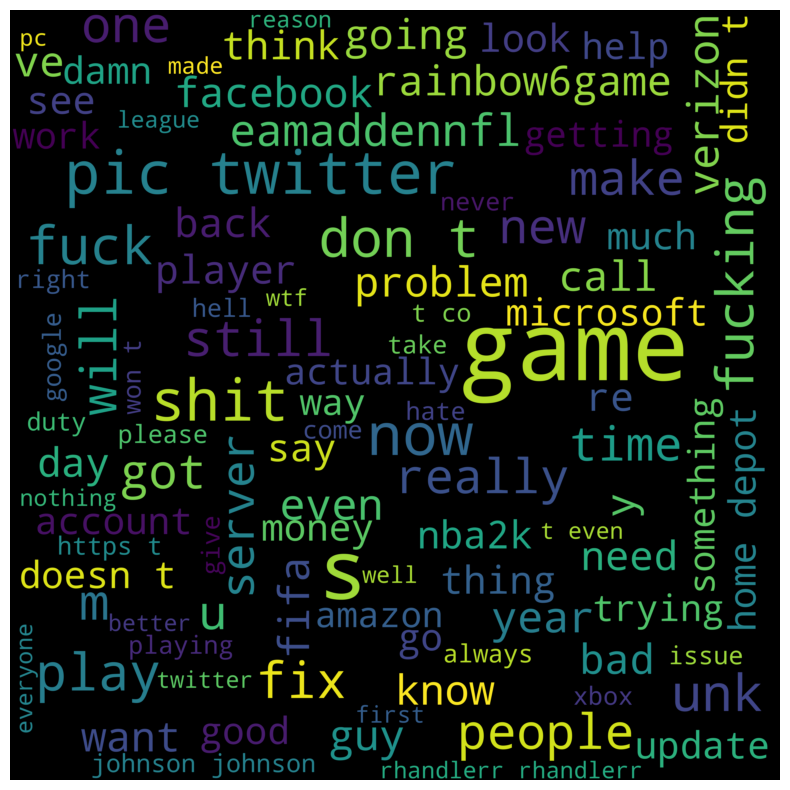

In [14]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Negative"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

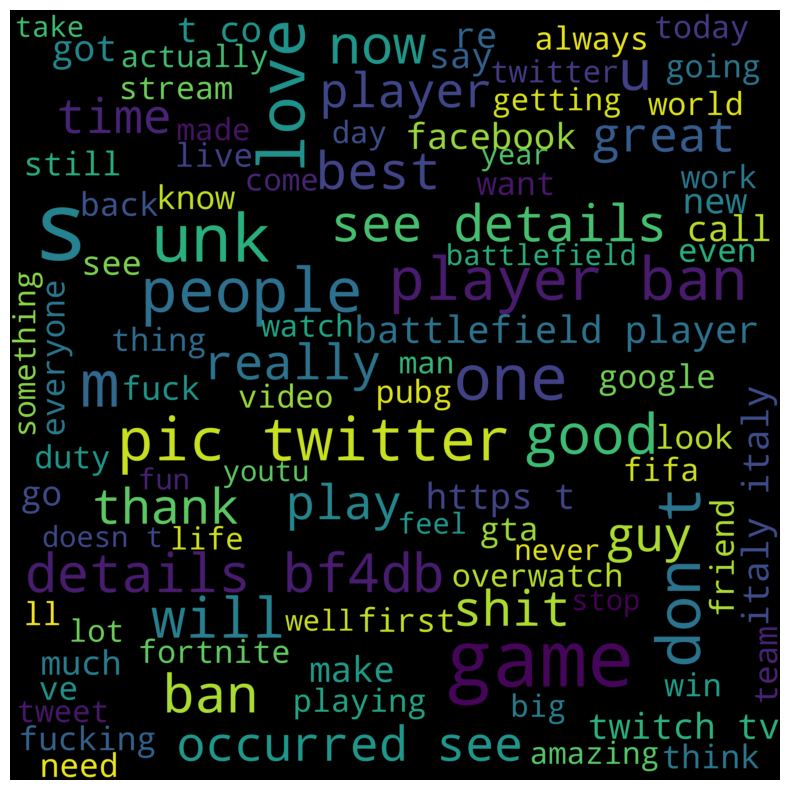

In [15]:
# The irrelevant tweets show a similar trend as negative ones, 
# something that will impact the overall prediction performance.
word_cloud_text = ''.join(train_data[train_data["type"]=="Irrelevant"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
'''
Then, on the neutral side, there are almost no curse words and the most important ones are different from the other 3 categories.
'''

'\nThen, on the neutral side, there are almost no curse words and the most important ones are different from the other 3 categories.\n'

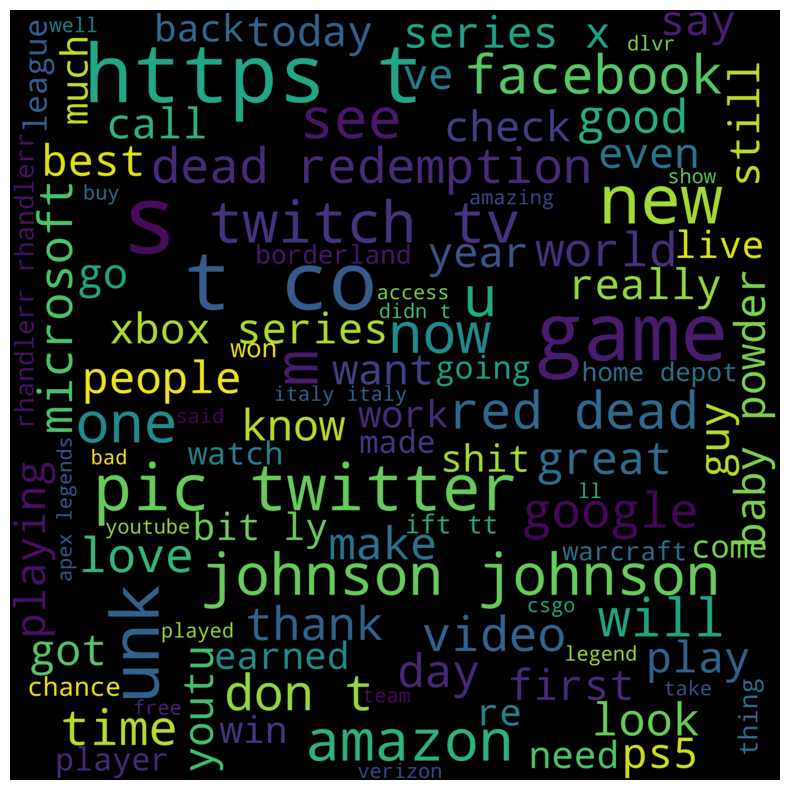

In [17]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Neutral"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [18]:
'''
Finally, in this section, the information was grouped by the brand (or in this case the column information) to make a barplot that shows the number of tweets for each one.
'''
#Count information per category
plot1=train.groupby(by=["information","type"]).count().reset_index()
plot1.head()

,information,type,id,text,lower
0,Amazon,Irrelevant,192,186,192
1,Amazon,Negative,576,575,576
2,Amazon,Neutral,1236,1207,1236
3,Amazon,Positive,312,308,312
4,ApexLegends,Irrelevant,192,192,192


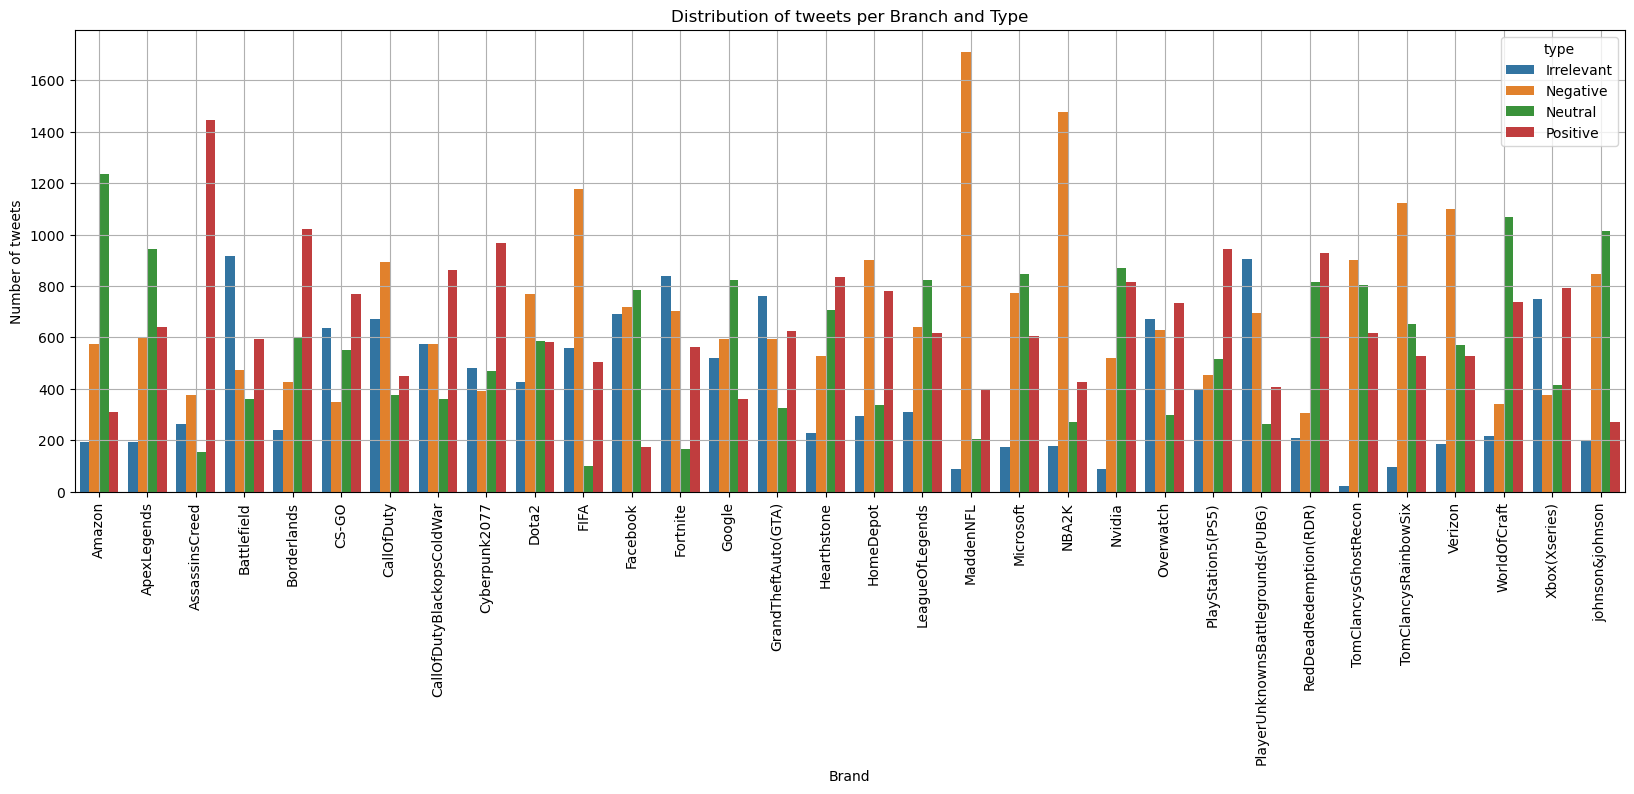

In [19]:
#Figure of comparison per branch
plt.figure(figsize=(20,6))
sns.barplot(data=plot1,x="information",y="id",hue="type")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Type");

In [20]:
'''
With the clean text, the initial number of unique tokens was counted to identify the model complexity. As presented, there are more than 30 thousand unique words
'''

'\nWith the clean text, the initial number of unique tokens was counted to identify the model complexity. As presented, there are more than 30 thousand unique words\n'

In [21]:
#Text splitting
tokens_text = [word_tokenize(str(word)) for word in train_data.lower]
#Unique word counter
tokens_counter = [item for sublist in tokens_text for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))

Number of tokens:  30436


In [22]:
train_data.head(4)

,id,information,type,text,lower
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...


In [24]:
#Choosing english stopwords
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

In [25]:
#Initial Bag of Words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, #English Stopwords
    ngram_range=(1, 1) #analysis of one word
)

In [26]:
#Train - Test splitting
reviews_train, reviews_test = train_test_split(train_data, test_size=0.2, random_state=0)

In [27]:
#Creation of encoding related to train dataset
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
#Transformation of test dataset with train encoding
X_test_bow = bow_counts.transform(reviews_test.lower)

C:\Users\Biswajit\anaconda3\envs\kaggleenv\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\Biswajit\anaconda3\envs\kaggleenv\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [28]:
#Labels for train and test encoding
y_train_bow = reviews_train['type']
y_test_bow = reviews_test['type']

In [29]:
y_test_bow.value_counts() / y_test_bow.shape[0]

type
Negative      0.299190
Positive      0.282252
Neutral       0.245632
Irrelevant    0.172926
Name: count, dtype: float64

In [30]:
# Logistic regression
model1 = LogisticRegression(C=1, solver="liblinear",max_iter=200)
model1.fit(X_train_bow, y_train_bow)
# Prediction
test_pred = model1.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)

Accuracy:  81.50230970074313


C:\Users\Biswajit\anaconda3\envs\kaggleenv\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [31]:
#Validation data
X_val_bow = bow_counts.transform(val_data.lower)
y_val_bow = val_data['type']

In [32]:
X_val_bow

<1000x28993 sparse matrix of type '<class 'numpy.int64'>'
	with 12913 stored elements in Compressed Sparse Row format>

In [33]:
Val_res = model1.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_res) * 100)

Accuracy:  91.7


In [34]:
'''
Finally, another Bag of Words was used. This had an n-gram of 4 while not classifying the stopwords, using all the available information.

The Test dataset got to 90% while on the validation data the accuracy was 98%, showing that this approach was better than the simple n-gram and stopwords model.
'''

'\nFinally, another Bag of Words was used. This had an n-gram of 4 while not classifying the stopwords, using all the available information.\n\nThe Test dataset got to 90% while on the validation data the accuracy was 98%, showing that this approach was better than the simple n-gram and stopwords model.\n'

In [35]:
#n-gram of 4 words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    ngram_range=(1,4)
)
#Data labeling
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
X_test_bow = bow_counts.transform(reviews_test.lower)
X_val_bow = bow_counts.transform(val_data.lower)

C:\Users\Biswajit\anaconda3\envs\kaggleenv\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [36]:
X_train_bow

<59745x1427378 sparse matrix of type '<class 'numpy.int64'>'
	with 4142213 stored elements in Compressed Sparse Row format>

In [37]:
model2 = LogisticRegression(C=0.9, solver="liblinear",max_iter=1500)
# Logistic regression
model2.fit(X_train_bow, y_train_bow)
# Prediction
test_pred_2 = model2.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_2) * 100)

Accuracy:  90.79467095132891
